# Predicting the exam score of students using regression estimators

In this notebook, I am going through an end-to-end project trying to use machine learning to predict exam scores  

## 1. Problem definition

How well can we predict the exam scores of different student given characteristics like hours of study, past exam scores etc.

## 2. Data

The dataset is downloaded from Kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

## 3. Evaluation

I am trying to get the best scores out of the 3 main regression evaluation metrics: 
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* R-squared (R²) Score

## 4. Features

* Hours_Studied`: Number of hours spent studying per week.

* Attendance: Percentage of classes attended.

* Parental_Involvement: Level of parental involvement in the student's education (Low, Medium, High).

* Access_to_Resources: Availability of educational resources (Low, Medium, High).

* Extracurricular_Activities: Participation in extracurricular activities (Yes, No).

* Sleep_Hours: Average number of hours of sleep per night.

* Previous_Scores: Scores from previous exams.

* Motivation_Level: Student's level of motivation (Low, Medium, High).

* Internet_Access: Availability of internet access (Yes, No).

* Tutoring_Sessions: Number of tutoring sessions attended per month.

* Family_Income: Family income level (Low, Medium, High).

* Teacher_Quality: Quality of the teachers (Low, Medium, High).

* School_Type: Type of school attended (Public, Private).

* Peer_Influence: Influence of peers on academic performance (Positive, Neutral, Negative).

* Physical_Activity: Average number of hours of physical activity per week.

* Learning_Disabilities: Presence of learning disabilities (Yes, No).

* Parental_Education_Level: Highest education level of parents (High School, College, Postgraduate).

* Distance_from_Home: Distance from home to school (Near, Moderate, Far).

* Gender: Gender of the student (Male, Female).

* Exam_Score: Final exam score.

### Preparing the tools

Include all the tools needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Loading the data

In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Data analysis (EDA)

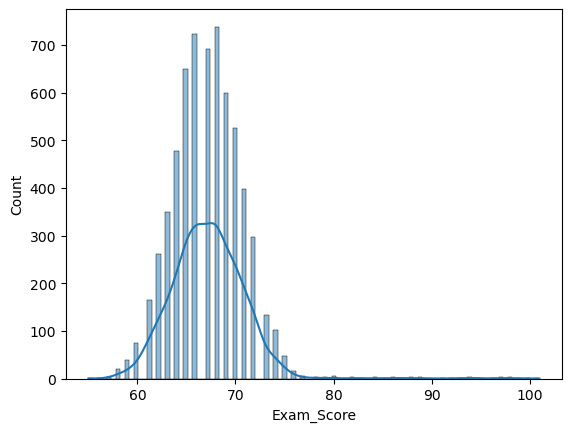

In [11]:
sns.histplot(data=df.Exam_Score, bins=100, kde=True);

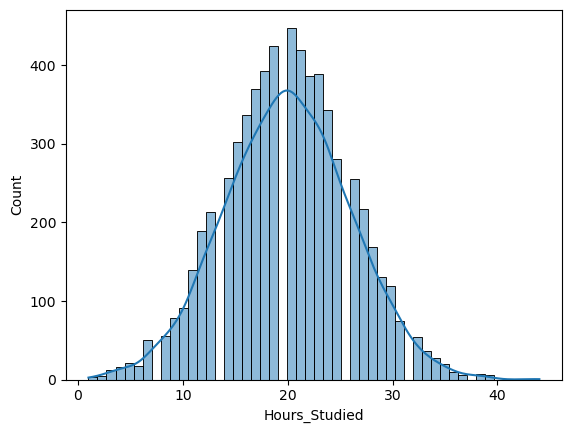

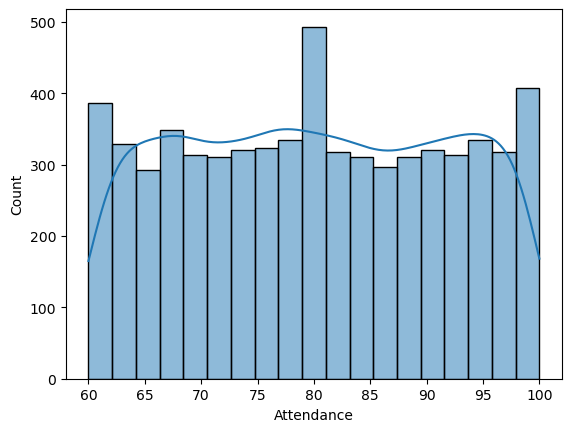

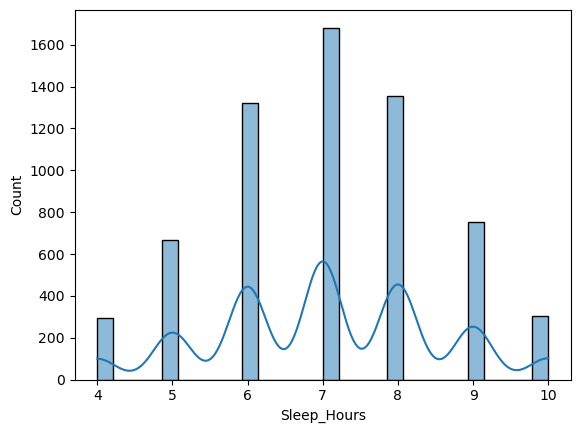

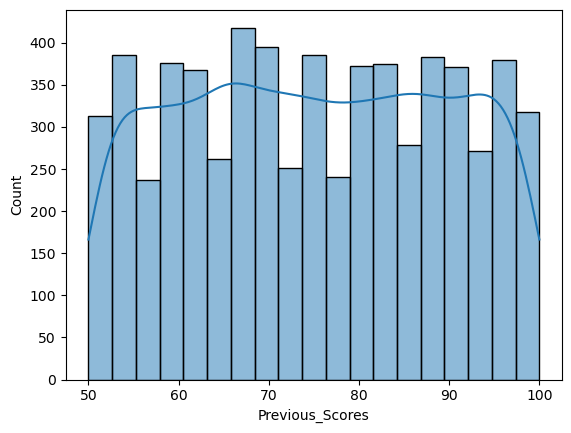

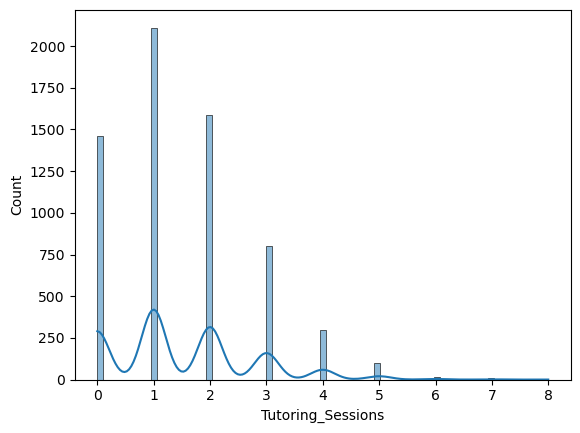

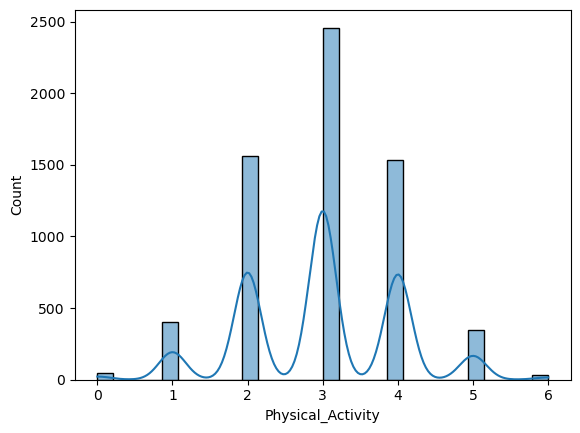

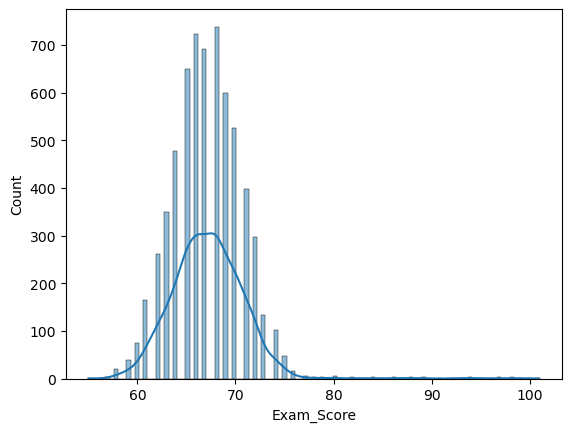

In [28]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col],kde=True)
        plt.show()

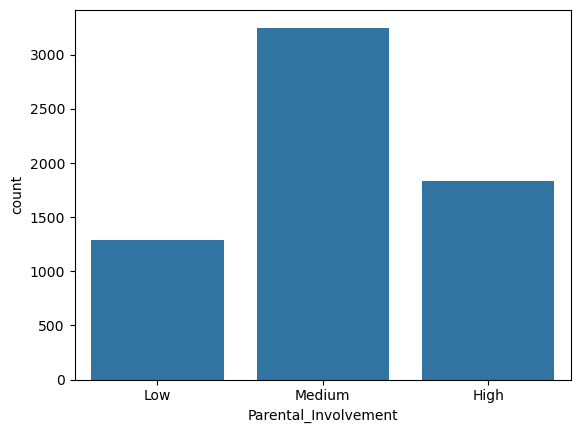

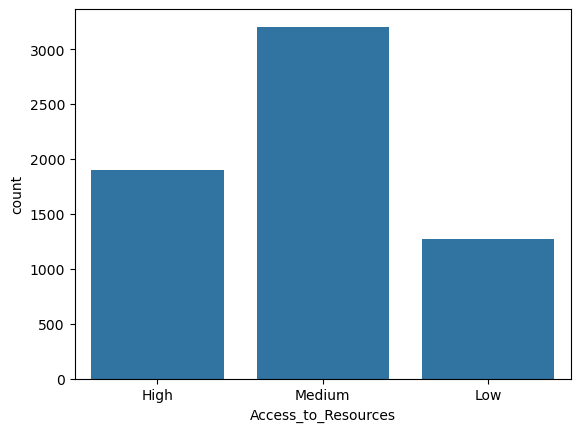

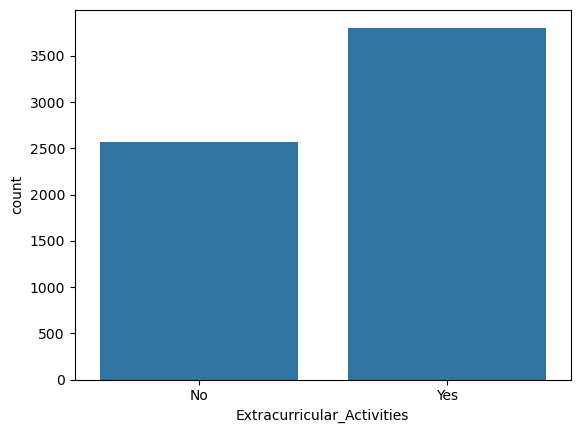

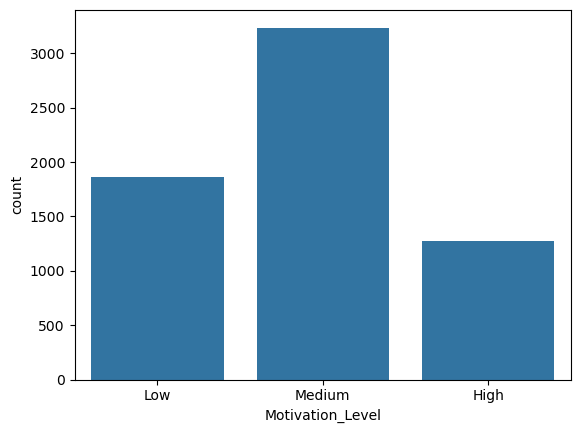

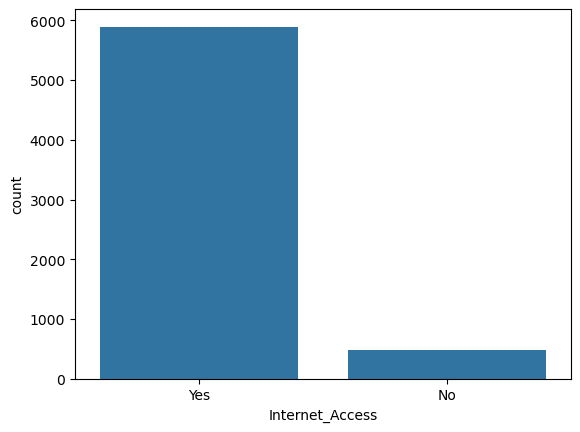

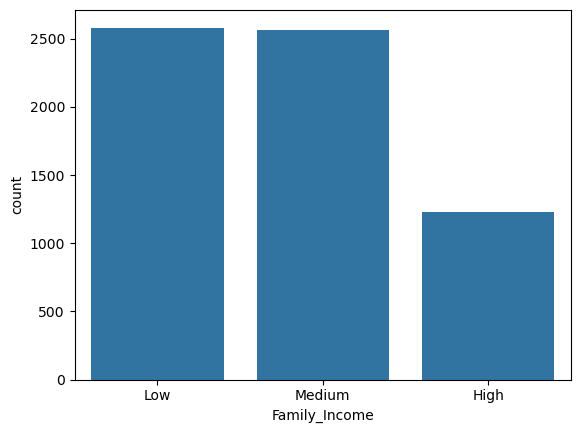

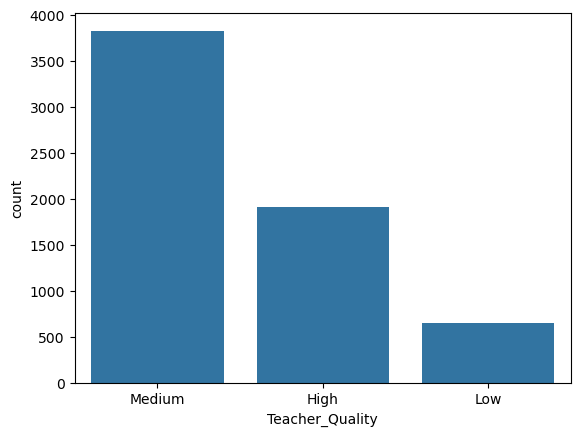

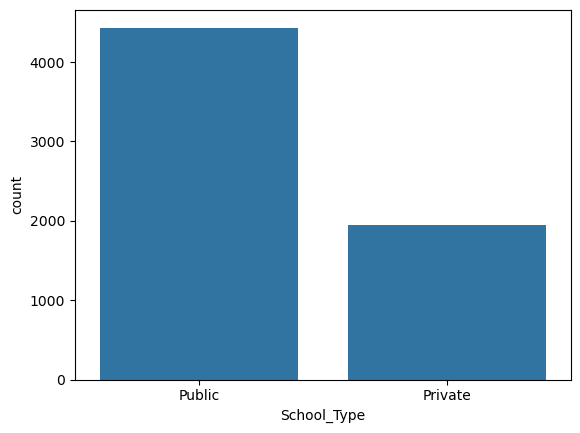

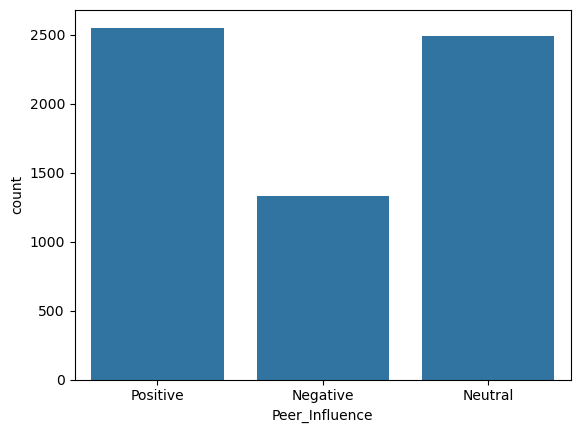

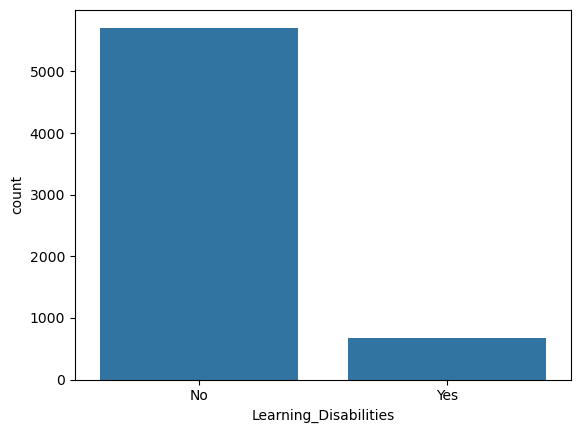

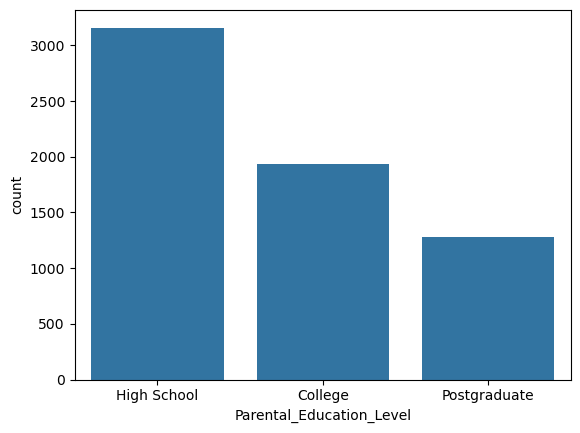

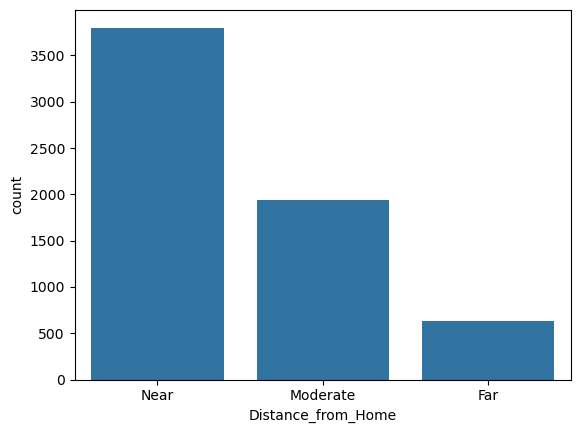

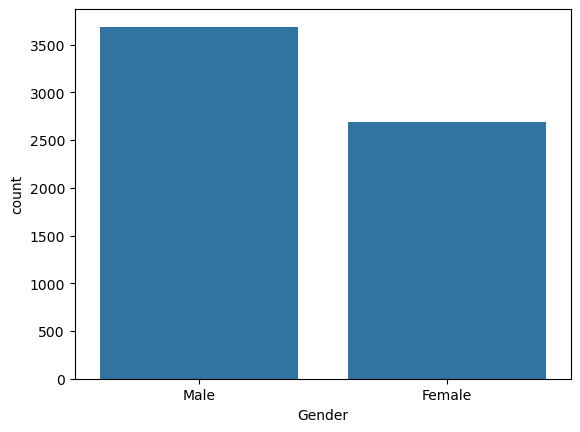

In [27]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

### Encoding categorical features to plot a correlation matrix

In [31]:
for label, content in df.items():
    if df[label].dtype == "O":
        le = LabelEncoder()
        df[label] = le.fit_transform(df[label])
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


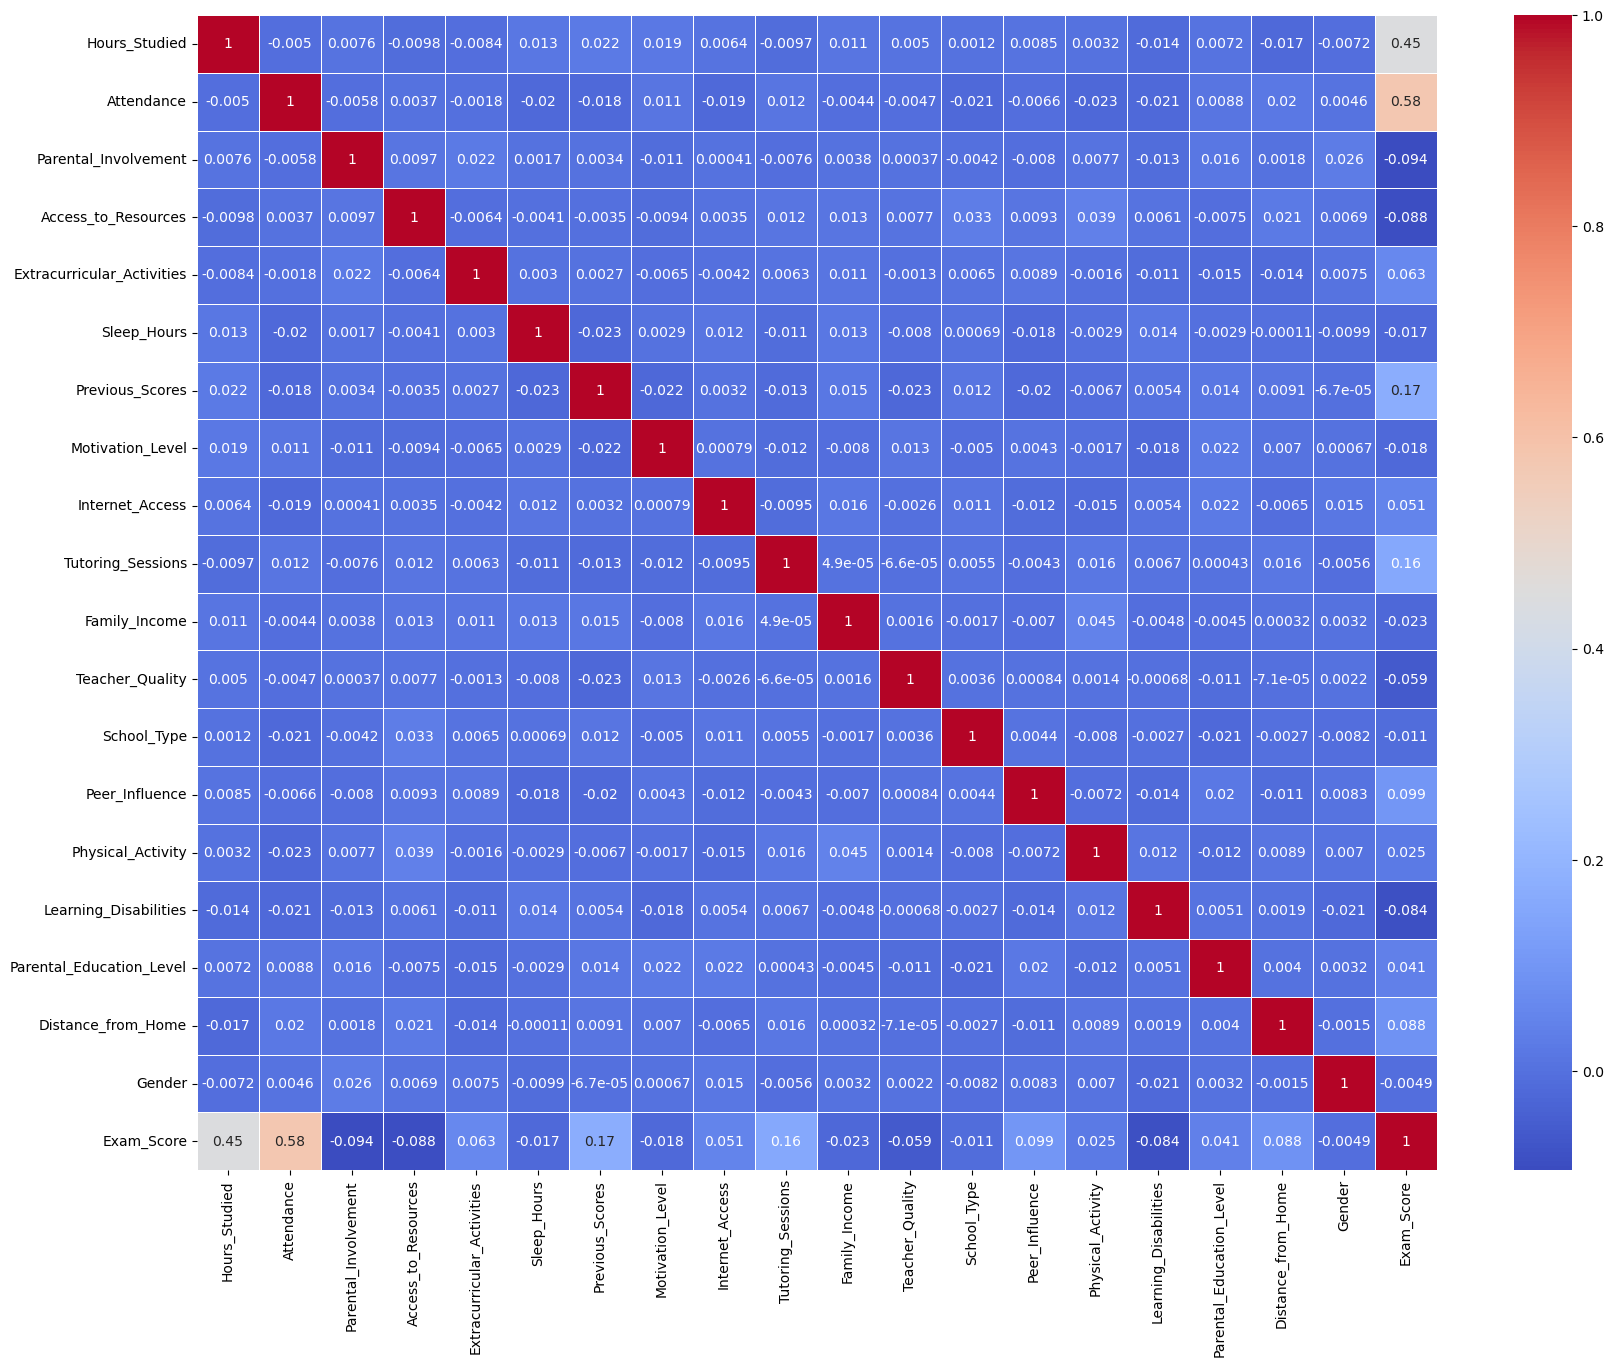

In [32]:
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## 5. Modelling

In [35]:
X, y = df.drop("Exam_Score", axis=1), df.Exam_Score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model_dict = {
    "Ridge": Ridge(),
    "RandomForestRegressor": RandomForestRegressor(),
    "LinearRegression": LinearRegression()
}
score_dict = {}

def fit_and_score(model_dict, score_dict, X_train, X_test, y_train, y_test):
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        scores = []
        scores.append(mean_absolute_error(y_test,y_preds)), scores.append(mean_squared_error(y_test,y_preds)), scores.append(r2_score(y_test,y_preds))
        score_dict[name] = scores
    return score_dict

score_dict = fit_and_score(model_dict, score_dict, X_train, X_test, y_train, y_test)
score_dict

{'Ridge': [1.0642450303974447, 5.215293282709907, 0.6643809633249897],
 'RandomForestRegressor': [1.155626959247649,
  5.735407523510971,
  0.6309101245828386],
 'LinearRegression': [1.0642138413620055,
  5.215195379547095,
  0.6643872636734858]}

In [47]:
scores_df = pd.DataFrame(score_dict, index = ["MAE", "MSE", "R2"])
scores_df

,Ridge,RandomForestRegressor,LinearRegression
MAE,1.064245,1.155627,1.064214
MSE,5.215293,5.735408,5.215195
R2,0.664381,0.630910,0.664387


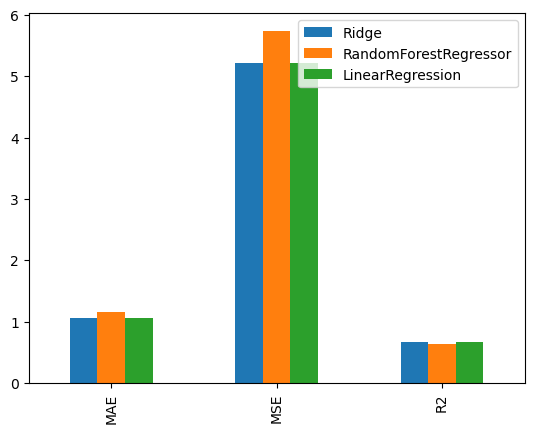

In [49]:
scores_df.plot(kind = "bar");

Best model so far is the Linear Regression lets try to hyperparameter tune it

### Hyperparameter tuning with RandomizedSearchCV

In [50]:
param_dict = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

rs_lr = RandomizedSearchCV(LinearRegression(),
                           param_distributions=param_dict,
                           cv=5,
                           n_iter=80,
                           verbose=True,
                           n_jobs=-1)
rs_lr.fit(X_train, y_train)

C:\Users\epaci\OneDrive\Desktop\ml\student-performance-regression-project\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 40 is smaller than n_iter=80. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=80, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]},
                   verbose=True)

In [51]:
rs_lr.best_params_

{'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [53]:
rs_lr.best_score_

0.642592960067941

In [55]:
params = {'alpha': (np.logspace(-8, 8, 100))}
rs_ridge = RandomizedSearchCV(Ridge(),
                           param_distributions=params,
                           cv=5,
                           n_iter=50,
                           verbose=True,
                           n_jobs=-1)
rs_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])},
                   verbose=True)

In [56]:
rs_ridge.best_params_

{'alpha': 7.742636826811277}

In [57]:
rs_ridge.score(X_test,y_test)

0.6643361042815046

In [58]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True,
                           n_jobs=-1)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\epaci\OneDrive\Desktop\ml\student-performance-regression-project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
260 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\epaci\OneDrive\Desktop\ml\student-performance-regression-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\epaci\OneDrive\Desktop\ml\student-performance-regression-project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\epaci\On

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=True)

In [60]:
rs_rf.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [61]:
rs_rf.score(X_test,y_test)

0.6542606502850479

In [62]:
rs_rf.best_score_

0.6387653531431792

In [63]:
# Test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.3,random_state=0)
model=LinearRegression()

model.fit(x_train,y_train)


model.score(x_test,y_test)

0.6591451919762066